In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">reading the dataset</h1>
</body>
</html><!DOCTYPE html>

In [2]:
iris = pd.read_csv('iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">necessary functions & operators</h1>
</body>
</html><!DOCTYPE html>

In [3]:
def first_population(number_of_genotypes):
    genotypes = np.array([[random.randint(0, 2) for _ in range(150)] for _ in range(number_of_genotypes)])
    genotypes = np.array([np.append(genotypes[i], 0.0) for i in range(number_of_genotypes)])
    return genotypes

In [4]:
def distance(genotype):
    cluster0_indices, cluster1_indices, cluster2_indices = np.array([]), np.array([]), np.array([])
    
    for i in range(0, 150):
        if genotype[i] == 0:
            cluster0_indices = np.append(cluster0_indices, i)
        if genotype[i] == 1:
            cluster1_indices = np.append(cluster1_indices, i)
        if genotype[i] == 2:
            cluster2_indices = np.append(cluster2_indices, i)
            
    cluster0 = iris.iloc[cluster0_indices]
    cluster1 = iris.iloc[cluster1_indices]
    cluster2 = iris.iloc[cluster2_indices]
    ########################################################################################################################
    # difference0 = np.mean([cluster0['sepal_length'].var(), cluster0['sepal_width'].var(), cluster0['petal_length'].var(), cluster0['petal_width'].var()])
    # difference1 = np.mean([cluster1['sepal_length'].var(), cluster1['sepal_width'].var(), cluster1['petal_length'].var(), cluster1['petal_width'].var()])
    # difference2 = np.mean([cluster2['sepal_length'].var(), cluster2['sepal_width'].var(), cluster2['petal_length'].var(), cluster2['petal_width'].var()])
    # 
    # size_of_cluster0, size_of_cluster1, size_of_cluster2 = len(cluster0) / 150, len(cluster1) / 150, len(cluster2) / 150
    # 
    # difference = np.mean([difference0 * size_of_cluster0, difference1 * size_of_cluster1, difference2 * size_of_cluster2])
########################################################################################################################
    difference0 = np.mean([np.linalg.norm(cluster0['sepal_length'] - cluster0['sepal_length'].mean()), np.linalg.norm(cluster0['sepal_width'] - cluster0['sepal_width'].mean()), np.linalg.norm(cluster0['petal_length'] - cluster0['petal_length'].mean()), np.linalg.norm(cluster0['petal_width'] - cluster0['petal_width'].mean())])
    difference1 = np.mean([np.linalg.norm(cluster1['sepal_length'] - cluster1['sepal_length'].mean()), np.linalg.norm(cluster1['sepal_width'] - cluster1['sepal_width'].mean()), np.linalg.norm(cluster1['petal_length'] - cluster1['petal_length'].mean()), np.linalg.norm(cluster1['petal_width'] - cluster1['petal_width'].mean())])
    difference2 = np.mean([np.linalg.norm(cluster2['sepal_length'] - cluster2['sepal_length'].mean()), np.linalg.norm(cluster2['sepal_width'] - cluster2['sepal_width'].mean()), np.linalg.norm(cluster2['petal_length'] - cluster2['petal_length'].mean()), np.linalg.norm(cluster2['petal_width'] - cluster2['petal_width'].mean())])

    size_of_cluster0, size_of_cluster1, size_of_cluster2 = len(cluster0) / 150, len(cluster1) / 150, len(cluster2) / 150
    
    difference = np.sum([difference0 * size_of_cluster0, difference1 * size_of_cluster1, difference2 * size_of_cluster2])
    
    return difference

In [5]:
def distances(genotypes):
    for genotype in genotypes:
        genotype[-1] = distance(genotype[:-1])
    return genotypes

In [6]:
def selection(genotypes, number_of_remaining_genotypes):
    gens = np.array(sorted(genotypes, key=lambda x: x[-1]))
    return gens[:number_of_remaining_genotypes]

In [7]:
def mutation(child):
    i = random.randint(0, 149)
    child[i] = random.randint(0, 2)
    return child

In [8]:
def crossover(genotypes, number_of_children_per_couple, rate_of_mutations):
    gens = genotypes.copy()
    for parent1 in genotypes:
        for parent2 in genotypes:
            for i in range(number_of_children_per_couple):
                child = np.array([random.randint(0, 1) for _ in range(150)])
                child = np.append(child, 0.0)
                for j in range(150):
                    if random.random() < 0.5:
                        child[j] = parent1[j]
                    else:
                        child[j] = parent2[j]
                
                if random.random() < rate_of_mutations:
                    child = mutation(child)
                    
                gens = np.append(gens, [child], axis=0)
    return gens

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">measuring accuracy of predicted classes, considering all of the 6 possible permutations</h1>
</body>
</html><!DOCTYPE html>

In [9]:
def cluster_accuracy(predicted_labels):
    actual_labels = iris['class']
    
    actual_labels1 = actual_labels.replace('Iris-setosa', 0.0)
    actual_labels1 = actual_labels1.replace('Iris-versicolor', 1.0)
    actual_labels1 = actual_labels1.replace('Iris-virginica', 2.0)
    perm1 = np.mean(actual_labels1 == predicted_labels)
    
    max_perm = perm1
    best_labels = actual_labels1
        
    actual_labels2 = actual_labels.replace('Iris-setosa', 0.0)
    actual_labels2 = actual_labels2.replace('Iris-versicolor', 2.0)
    actual_labels2 = actual_labels2.replace('Iris-virginica', 1.0)
    perm2 = np.mean(actual_labels2 == predicted_labels)
    
    if perm2 > max_perm:
        max_perm = perm2
        best_labels = actual_labels2
        
    actual_labels3 = actual_labels.replace('Iris-setosa', 1.0)
    actual_labels3 = actual_labels3.replace('Iris-versicolor', 0.0)
    actual_labels3 = actual_labels3.replace('Iris-virginica', 2.0)
    perm3 = np.mean(actual_labels3 == predicted_labels)
    
    if perm3 > max_perm:
        max_perm = perm3
        best_labels = actual_labels3
        
    actual_labels4 = actual_labels.replace('Iris-setosa', 1.0)
    actual_labels4 = actual_labels4.replace('Iris-versicolor', 2.0)
    actual_labels4 = actual_labels4.replace('Iris-virginica', 0.0)
    perm4 = np.mean(actual_labels4 == predicted_labels)
    
    if perm4 > max_perm:
        max_perm = perm4
        best_labels = actual_labels4
        
    actual_labels5 = actual_labels.replace('Iris-setosa', 2.0)
    actual_labels5 = actual_labels5.replace('Iris-versicolor', 1.0)
    actual_labels5 = actual_labels5.replace('Iris-virginica', 0.0)
    perm5 = np.mean(actual_labels5 == predicted_labels)
    
    if perm5 > max_perm:
        max_perm = perm5
        best_labels = actual_labels5
        
    actual_labels6 = actual_labels.replace('Iris-setosa', 2.0)
    actual_labels6 = actual_labels6.replace('Iris-versicolor', 0.0)
    actual_labels6 = actual_labels6.replace('Iris-virginica', 1.0)
    perm6 = np.mean(actual_labels6 == predicted_labels)
    
    if perm6 > max_perm:
        best_labels = actual_labels6
        
    return best_labels, metrics.accuracy_score(best_labels, predicted_labels)

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">Evolution</h1>
</body>
</html><!DOCTYPE html>

In [10]:
#first population
first_population = first_population(number_of_genotypes=1000)
first_population = distances(first_population)
first_population = selection(first_population, number_of_remaining_genotypes=10)

new_genotypes = first_population.copy()
best_distances = []

print('first population is created')

# over generations
for i in range(150):
    new_genotypes = crossover(new_genotypes, number_of_children_per_couple = 2, rate_of_mutations = 0.1)
    new_genotypes = distances(new_genotypes)
    new_genotypes = selection(new_genotypes, number_of_remaining_genotypes=10)
    print(str(i) + ': ' + str(new_genotypes[0][-1]))
    best_distances.append(new_genotypes[0][-1])

first population is created
0: 6.2797148930142
1: 6.145984440670728
2: 6.042500214768498
3: 5.895548157601837
4: 5.787374957353439
5: 5.598632428184674
6: 5.516699776073079
7: 5.492079143588796
8: 5.486980205040096
9: 5.443310316652096
10: 5.39890257815269
11: 5.297108617944821
12: 5.259326378095371
13: 5.2470911273244365
14: 5.226914022517911
15: 5.206320339456768
16: 5.178125850254373
17: 5.139354605759441
18: 5.100573859169499
19: 5.069456354712722
20: 5.0358114450015625
21: 4.992923554641776
22: 4.910497048098753
23: 4.896934111636835
24: 4.892594449116983
25: 4.888179953248221
26: 4.849237884835956
27: 4.806924953757227
28: 4.7970779717608645
29: 4.743767235705894
30: 4.718383526836212
31: 4.68146044076276
32: 4.64073802933079
33: 4.631282040551581
34: 4.608566140515234
35: 4.6001851960620295
36: 4.55140442468688
37: 4.537357020805978
38: 4.496681016379231
39: 4.486570028023558
40: 4.479583396221499
41: 4.412995760367517
42: 4.405866665379875
43: 4.374325958833019
44: 4.3563439631

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">best distances over generations</h1>
</body>
</html><!DOCTYPE html>

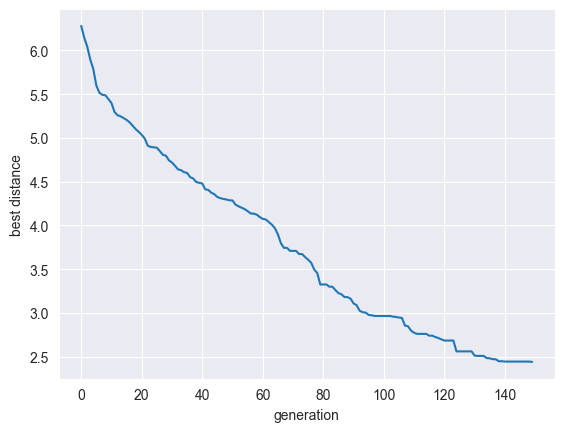

In [11]:
plt.plot(best_distances)
plt.ylabel('best distance')
plt.xlabel('generation')
plt.show()

In [12]:
best_genotype = new_genotypes[0]

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">Accuracy</h1>
</body>
</html><!DOCTYPE html>

In [13]:
predicted_labels = best_genotype[:-1] 
best_labels, accuracy = cluster_accuracy(predicted_labels)

print('Accuracy: ' + str(accuracy))

Accuracy: 0.9333333333333333


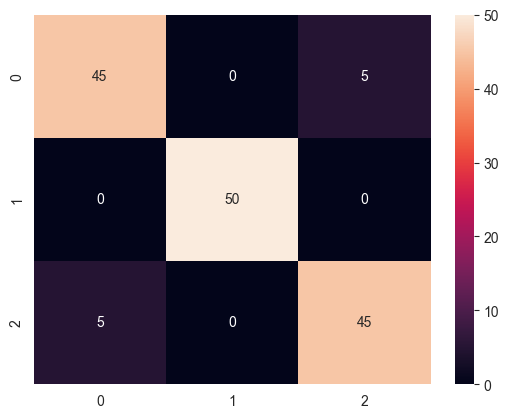

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(best_labels, predicted_labels)
sns.heatmap(cm, annot=True)
plt.show()

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">real classes for samples</h1>
</body>
</html><!DOCTYPE html>

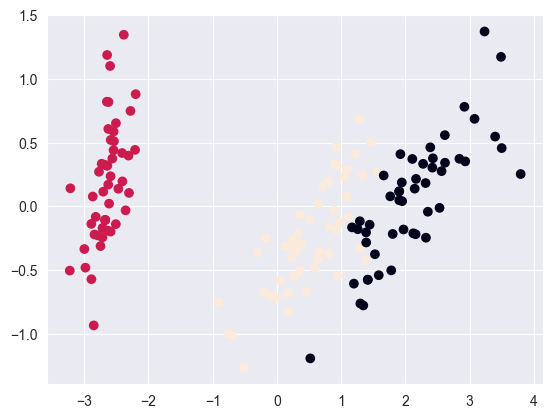

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.iloc[:, :-1])
iris_pca = pca.transform(iris.iloc[:, :-1])

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=best_labels)
plt.show()

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">predicted classes for samples</h1>
</body>
</html><!DOCTYPE html>

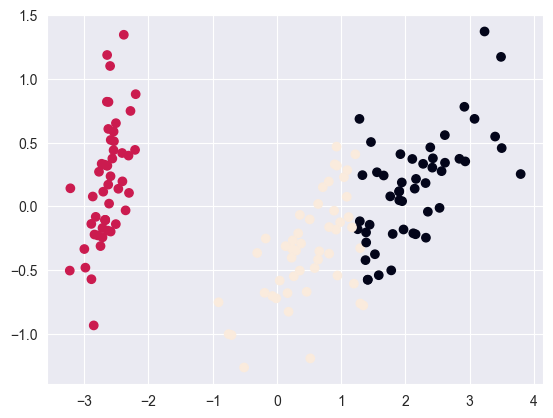

In [16]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=predicted_labels)
plt.show()

<!DOCTYPE html>
<html>
<body>
    <h1 style="color:green;">KMeans clustering</h1>
</body>
</html><!DOCTYPE html>

Accuracy: 0.8866666666666667


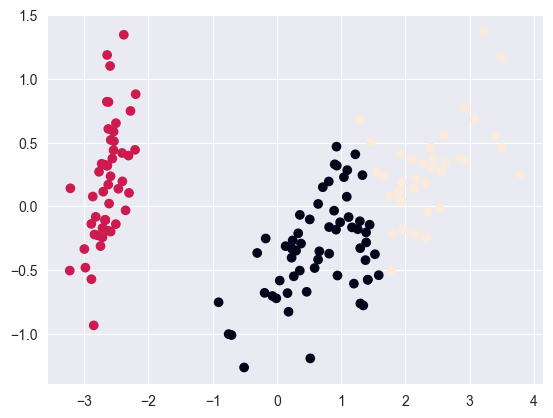

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_pca)
kmeans_labels = kmeans.labels_

_, kmeans_accuracy = cluster_accuracy(kmeans_labels)
print('Accuracy: ' + str(kmeans_accuracy))

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_labels)
plt.show()